# Activity Directions
### Classifying Penguins

Please review the following site for information on our dataset of interest here: https://allisonhorst.github.io/palmerpenguinsLinks to an external site.

You can find the CSV file here: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-dataLinks to an external site.

This is a very nice, simple dataset with which to apply clustering techniques, classification techniques, or play around with different visualization methods. Your goal is to use the other variables in the measurement characteristics in the dataset to predict (classify) species.

### Assignment Specs

- You should compare AdaBoost to at least one of the following: a bagging model, a stacking model.
- Based on the visualizations seen at the links above you're probably also thinking that this classification task should not be that difficult. So, a secondary goal of this assignment is to test the effects of the AdaBoost function arguments on the algorithm's performance. 
- You should explore at least 3 different sets of settings for the function inputs, and you should do your best to find values for these inputs that actually change the results of your modelling. That is, try not to run three different sets of inputs that result in the same performance. The goal here is for you to better understand how to set these input values yourself in the future. Comment on what you discover about these inputs and how they behave.
- Your submission should be built and written with non-experts as the target audience. All of your code should still be included, but do your best to narrate your work in accessible ways.

# Notes
- A procedure that combines the outputs of many “weak” learners to produce a powerful “committee.”
- A weak classifier is one whose error rate is only slightly better than random guessing (i.e. a coin flip).
- Sequentially apply the weak classification algorithm to repeatedly modified versions of the data.
- When and How to use - You can technically boost most, if not all, machine learning algorithms! (with some popular versions)
- Small trees are popular choices for the weak learners

# Process
## import data

In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
peng = pd.read_csv(url)

peng = peng.dropna()
peng.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


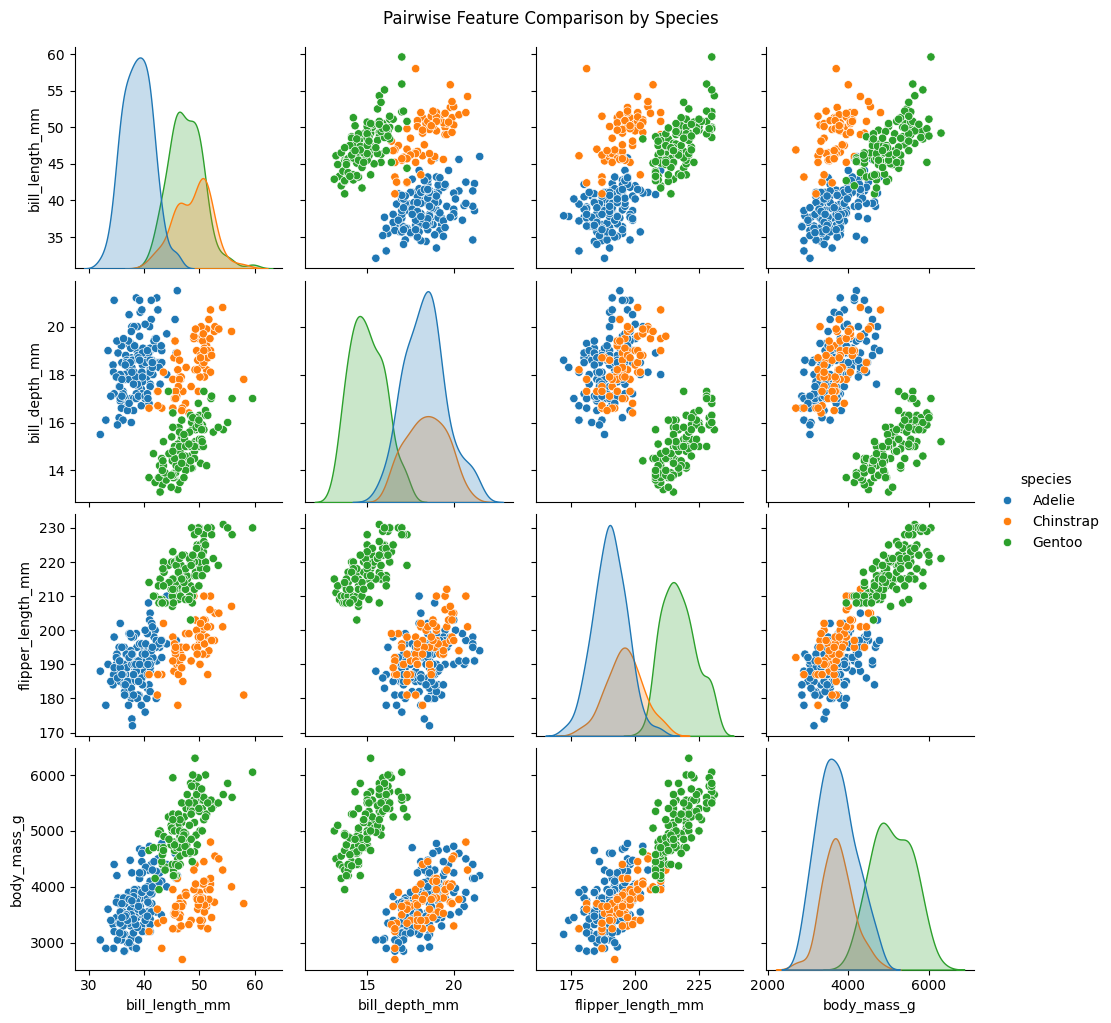

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(peng, hue="species")
plt.suptitle("Pairwise Feature Comparison by Species", y=1.02)
plt.show()

# Preprocessing

In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical variables
peng_encoded = peng.copy()
peng_encoded['species'] = LabelEncoder().fit_transform(peng['species'])
peng_encoded['sex'] = LabelEncoder().fit_transform(peng['sex'])
peng_encoded['island'] = LabelEncoder().fit_transform(peng['island'])

# Define features and target
X = peng_encoded.drop('species', axis=1)
y = peng_encoded['species']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model
## Base Case

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Base classifier: decision stump
base_estimator = DecisionTreeClassifier(max_depth=1)

# AdaBoost model
ada = AdaBoostClassifier(estimator=base_estimator, algorithm='SAMME')
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9850746268656716


## Tuned Model

In [28]:
params = [
    {"n_estimators": 1, "learning_rate": 0.5},
    {"n_estimators": 1, "learning_rate": 1.0},
    {"n_estimators": 1, "learning_rate": 1.5},
    {"n_estimators": 10, "learning_rate": 0.5},
    {"n_estimators": 10, "learning_rate": 1.0},
    {"n_estimators": 10, "learning_rate": 1.5},
    {"n_estimators": 25, "learning_rate": 0.5},
    {"n_estimators": 25, "learning_rate": 1.0},
    {"n_estimators": 25, "learning_rate": 1.5},
    {"n_estimators": 100, "learning_rate": 0.5},
    {"n_estimators": 100, "learning_rate": 1.0},
    {"n_estimators": 100, "learning_rate": 1.5}
]

results = []
for p in params:
    model = AdaBoostClassifier(estimator=base_estimator, **p, algorithm='SAMME')
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results.append((p["n_estimators"], p["learning_rate"], acc))

# Show results
results_df = pd.DataFrame(results, columns=["n_estimators", "learning_rate", "accuracy"])
results_df


,n_estimators,learning_rate,accuracy
0,1,0.5,0.805970
1,1,1.0,0.805970
2,1,1.5,0.805970
3,10,0.5,0.985075
4,10,1.0,0.985075
5,10,1.5,0.985075
6,25,0.5,0.985075
7,25,1.0,0.970149
8,25,1.5,0.850746
9,100,0.5,0.985075


# Compare to Bagging

In [18]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(estimator=base_estimator, n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
bag_pred = bag.predict(X_test)
bag_acc = accuracy_score(y_test, bag_pred)

print("Bagging Accuracy:", bag_acc)

Bagging Accuracy: 0.8059701492537313


Thus we see that for this dataset the boosting model performs far better than the bagging. This may be because of the clear differences in each classification. 